In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('diabetic retinopathy.csv')

In [4]:
df.head()

,id,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,Class
0,1,1,1,22,22,22,19,18,14,49.895756,...,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,2,1,1,24,24,22,18,16,13,57.709936,...,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,3,1,1,62,60,59,54,47,33,55.831441,...,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,4,1,1,55,53,53,50,43,31,40.467228,...,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,5,1,1,44,44,44,41,39,27,18.026254,...,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1


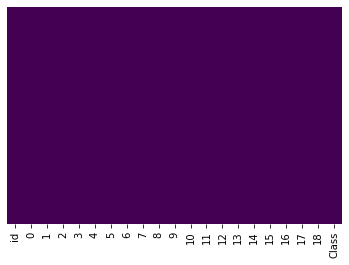

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

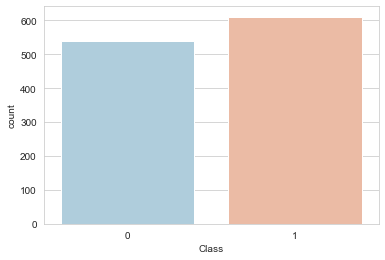

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Class',data=df,palette='RdBu_r')

Text(0.5, 1.0, 'Based on AM/FM based classification')

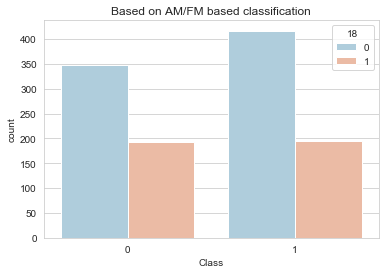

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Class',data=df,hue='18',palette='RdBu_r')
plt.title('Based on AM/FM based classification')

Text(0.5, 1.0, 'Based on Retinal Abnormality')

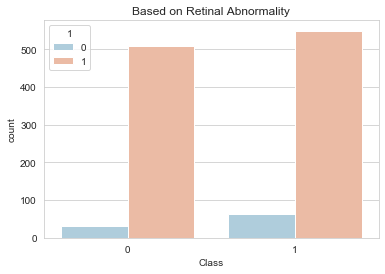

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Class',data=df,hue='1',palette='RdBu_r')
plt.title('Based on Retinal Abnormality')

In [17]:
from sklearn.model_selection import train_test_split

In [33]:
X = df.drop(['id','Class'],axis=1)
y = df['Class']
X.head()



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0


In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [29]:
scaled_features=scaler.transform(X)

In [31]:
df_feat= pd.DataFrame(scaled_features)
df_feat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.059054,0.298213,-0.641486,-0.618782,-0.576463,-0.630029,-0.551116,-0.473745,-0.242917,-0.246003,-0.296966,-0.271509,-0.218324,-0.194409,-0.205124,-0.186169,-1.294763,-0.468656,1.405048
1,0.059054,0.298213,-0.563391,-0.535778,-0.576463,-0.677410,-0.653676,-0.539992,-0.109250,0.032972,-0.465224,-0.408593,-0.224256,-0.197212,-0.205175,-0.186281,-0.082168,2.006054,-0.711719
2,0.059054,0.298213,0.920417,0.958299,1.046665,1.028299,0.936006,0.784951,-0.141383,0.227196,0.344463,0.769037,0.335538,0.152330,-0.110043,-0.164808,0.274283,1.121516,-0.711719
3,0.059054,0.298213,0.647084,0.667784,0.783456,0.838776,0.730886,0.652456,-0.404199,-0.214977,0.035830,0.316953,0.112573,0.056919,-0.195765,-0.199541,-1.423814,0.354501,-0.711719
4,0.059054,0.298213,0.217561,0.294265,0.388641,0.412349,0.525766,0.387468,-0.788069,-0.672306,-0.717335,-0.468311,-0.225828,-0.200905,-0.214968,-0.208100,-1.685874,0.844102,-0.711719


In [34]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, y, test_size=0.33, random_state=42)

In [35]:
logmodel = LogisticRegression()

In [36]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
predictions = logmodel.predict(X_test)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.62      0.85      0.72       169
           1       0.83      0.59      0.69       211

    accuracy                           0.70       380
   macro avg       0.72      0.72      0.70       380
weighted avg       0.74      0.70      0.70       380

[[143  26]
 [ 87 124]]


In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn = KNeighborsClassifier()

In [43]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [44]:
predictions=knn.predict(X_test)

In [47]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))      


              precision    recall  f1-score   support

           0       0.55      0.70      0.61       169
           1       0.69      0.53      0.60       211

    accuracy                           0.61       380
   macro avg       0.62      0.62      0.61       380
weighted avg       0.63      0.61      0.61       380

[[119  50]
 [ 99 112]]


In [65]:
error_rate = []

for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

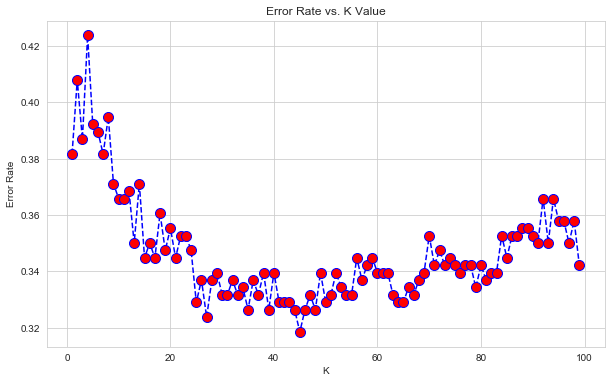

In [66]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [71]:
knn = KNeighborsClassifier(n_neighbors=70)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=80')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=80


[[151  18]
 [116  95]]


              precision    recall  f1-score   support

           0       0.57      0.89      0.69       169
           1       0.84      0.45      0.59       211

    accuracy                           0.65       380
   macro avg       0.70      0.67      0.64       380
weighted avg       0.72      0.65      0.63       380



In [84]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [85]:
X = df.drop(['id','Class'],axis=1).values
y = df['Class'].values

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [87]:
from sklearn.preprocessing import MinMaxScaler

In [88]:
mmscaler = MinMaxScaler()

In [90]:
mmscaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [91]:
X_train=mmscaler.transform(X_train)
X_test =mmscaler.transform(X_test)

In [93]:
X_train.shape

(863, 19)

In [94]:
model = Sequential()

model.add(Dense(units=18,activation='relu'))

model.add(Dense(units=9,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [95]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Train on 863 samples, validate on 288 samples
Epoch 1/600
863/863 [==============================] - 3s 3ms/sample - loss: 0.6932 - val_loss: 0.6895
Epoch 2/600
863/863 [==============================] - 0s 419us/sample - loss: 0.6869 - val_loss: 0.6827
Epoch 3/600
863/863 [==============================] - 0s 221us/sample - loss: 0.6834 - val_loss: 0.6777
Epoch 4/600
863/863 [==============================] - 0s 231us/sample - loss: 0.6794 - val_loss: 0.6729
Epoch 5/600
863/863 [==============================] - 0s 228us/sample - loss: 0.6732 - val_loss: 0.6640
Epoch 6/600
863/863 [==============================] - 0s 220us/sample - loss: 0.6627 - val_loss: 0.6498
Epoch 7/600
863/863 [==============================] - 0s 282us/sample - loss: 0.6543 - val_loss: 0.6442
Epoch 8/600
863/863 [==============================] - 0s 227us/sample - loss: 0.6459 - val_loss: 0.6363
Epoch 9/600
863/863 [==============================] - 0s 217us/sample - loss: 0.6397 - val_loss: 0.6355
Epoch 10/60

Epoch 78/600
863/863 [==============================] - 0s 241us/sample - loss: 0.5393 - val_loss: 0.5952
Epoch 79/600
863/863 [==============================] - 0s 227us/sample - loss: 0.5384 - val_loss: 0.5837
Epoch 80/600
863/863 [==============================] - 0s 192us/sample - loss: 0.5385 - val_loss: 0.5758
Epoch 81/600
863/863 [==============================] - 0s 192us/sample - loss: 0.5386 - val_loss: 0.5800
Epoch 82/600
863/863 [==============================] - 0s 193us/sample - loss: 0.5372 - val_loss: 0.5826
Epoch 83/600
863/863 [==============================] - 0s 189us/sample - loss: 0.5347 - val_loss: 0.5874
Epoch 84/600
863/863 [==============================] - 0s 183us/sample - loss: 0.5353 - val_loss: 0.5772
Epoch 85/600
863/863 [==============================] - 0s 123us/sample - loss: 0.5323 - val_loss: 0.5750
Epoch 86/600
863/863 [==============================] - 0s 126us/sample - loss: 0.5367 - val_loss: 0.5780
Epoch 87/600
863/863 [========================

Epoch 155/600
863/863 [==============================] - 0s 193us/sample - loss: 0.5023 - val_loss: 0.5641
Epoch 156/600
863/863 [==============================] - 0s 118us/sample - loss: 0.4995 - val_loss: 0.5639
Epoch 157/600
863/863 [==============================] - 0s 128us/sample - loss: 0.4987 - val_loss: 0.5632
Epoch 158/600
863/863 [==============================] - 0s 122us/sample - loss: 0.5013 - val_loss: 0.5658
Epoch 159/600
863/863 [==============================] - 0s 216us/sample - loss: 0.4992 - val_loss: 0.5644
Epoch 160/600
863/863 [==============================] - 0s 121us/sample - loss: 0.4991 - val_loss: 0.5655
Epoch 161/600
863/863 [==============================] - 0s 183us/sample - loss: 0.4972 - val_loss: 0.5754
Epoch 162/600
863/863 [==============================] - 0s 214us/sample - loss: 0.4983 - val_loss: 0.5838
Epoch 163/600
863/863 [==============================] - 0s 130us/sample - loss: 0.4970 - val_loss: 0.5642
Epoch 164/600
863/863 [==============

863/863 [==============================] - 0s 153us/sample - loss: 0.4738 - val_loss: 0.5551
Epoch 232/600
863/863 [==============================] - 0s 156us/sample - loss: 0.4743 - val_loss: 0.5592
Epoch 233/600
863/863 [==============================] - 0s 154us/sample - loss: 0.4758 - val_loss: 0.5540
Epoch 234/600
863/863 [==============================] - 0s 154us/sample - loss: 0.4741 - val_loss: 0.5532
Epoch 235/600
863/863 [==============================] - 0s 156us/sample - loss: 0.4755 - val_loss: 0.5599
Epoch 236/600
863/863 [==============================] - 0s 157us/sample - loss: 0.4737 - val_loss: 0.5621
Epoch 237/600
863/863 [==============================] - 0s 158us/sample - loss: 0.4861 - val_loss: 0.5526
Epoch 238/600
863/863 [==============================] - 0s 158us/sample - loss: 0.4748 - val_loss: 0.5538
Epoch 239/600
863/863 [==============================] - 0s 153us/sample - loss: 0.4758 - val_loss: 0.5614
Epoch 240/600
863/863 [============================

863/863 [==============================] - 0s 150us/sample - loss: 0.4589 - val_loss: 0.5478
Epoch 308/600
863/863 [==============================] - 0s 133us/sample - loss: 0.4661 - val_loss: 0.5512
Epoch 309/600
863/863 [==============================] - 0s 140us/sample - loss: 0.4582 - val_loss: 0.5477
Epoch 310/600
863/863 [==============================] - 0s 144us/sample - loss: 0.4575 - val_loss: 0.5514
Epoch 311/600
863/863 [==============================] - 0s 149us/sample - loss: 0.4576 - val_loss: 0.5732
Epoch 312/600
863/863 [==============================] - 0s 143us/sample - loss: 0.4609 - val_loss: 0.5580
Epoch 313/600
863/863 [==============================] - 0s 145us/sample - loss: 0.4555 - val_loss: 0.5714
Epoch 314/600
863/863 [==============================] - 0s 151us/sample - loss: 0.4633 - val_loss: 0.5517
Epoch 315/600
863/863 [==============================] - 0s 146us/sample - loss: 0.4589 - val_loss: 0.5657
Epoch 316/600
863/863 [============================

863/863 [==============================] - 0s 113us/sample - loss: 0.4484 - val_loss: 0.5543
Epoch 384/600
863/863 [==============================] - 0s 167us/sample - loss: 0.4504 - val_loss: 0.5531
Epoch 385/600
863/863 [==============================] - 0s 195us/sample - loss: 0.4474 - val_loss: 0.5478
Epoch 386/600
863/863 [==============================] - 0s 133us/sample - loss: 0.4510 - val_loss: 0.5517
Epoch 387/600
863/863 [==============================] - 0s 106us/sample - loss: 0.4452 - val_loss: 0.5706
Epoch 388/600
863/863 [==============================] - 0s 114us/sample - loss: 0.4482 - val_loss: 0.5782
Epoch 389/600
863/863 [==============================] - 0s 119us/sample - loss: 0.4477 - val_loss: 0.5675
Epoch 390/600
863/863 [==============================] - 0s 113us/sample - loss: 0.4469 - val_loss: 0.5614
Epoch 391/600
863/863 [==============================] - 0s 112us/sample - loss: 0.4463 - val_loss: 0.5486
Epoch 392/600
863/863 [============================

863/863 [==============================] - 0s 191us/sample - loss: 0.4360 - val_loss: 0.5495
Epoch 460/600
863/863 [==============================] - 0s 222us/sample - loss: 0.4389 - val_loss: 0.5679
Epoch 461/600
863/863 [==============================] - 0s 241us/sample - loss: 0.4390 - val_loss: 0.5508
Epoch 462/600
863/863 [==============================] - 0s 207us/sample - loss: 0.4350 - val_loss: 0.5541
Epoch 463/600
863/863 [==============================] - 0s 175us/sample - loss: 0.4364 - val_loss: 0.5599
Epoch 464/600
863/863 [==============================] - 0s 160us/sample - loss: 0.4360 - val_loss: 0.5545
Epoch 465/600
863/863 [==============================] - 0s 178us/sample - loss: 0.4392 - val_loss: 0.5601
Epoch 466/600
863/863 [==============================] - 0s 195us/sample - loss: 0.4393 - val_loss: 0.5554
Epoch 467/600
863/863 [==============================] - 0s 190us/sample - loss: 0.4339 - val_loss: 0.5508
Epoch 468/600
863/863 [============================

863/863 [==============================] - 0s 173us/sample - loss: 0.4383 - val_loss: 0.5490
Epoch 536/600
863/863 [==============================] - 0s 190us/sample - loss: 0.4303 - val_loss: 0.5584
Epoch 537/600
863/863 [==============================] - 0s 170us/sample - loss: 0.4301 - val_loss: 0.5746
Epoch 538/600
863/863 [==============================] - 0s 167us/sample - loss: 0.4263 - val_loss: 0.5469
Epoch 539/600
863/863 [==============================] - 0s 170us/sample - loss: 0.4365 - val_loss: 0.5591
Epoch 540/600
863/863 [==============================] - 0s 174us/sample - loss: 0.4331 - val_loss: 0.5506
Epoch 541/600
863/863 [==============================] - 0s 221us/sample - loss: 0.4388 - val_loss: 0.5474
Epoch 542/600
863/863 [==============================] - 0s 175us/sample - loss: 0.4275 - val_loss: 0.5522
Epoch 543/600
863/863 [==============================] - 0s 186us/sample - loss: 0.4293 - val_loss: 0.5544
Epoch 544/600
863/863 [============================

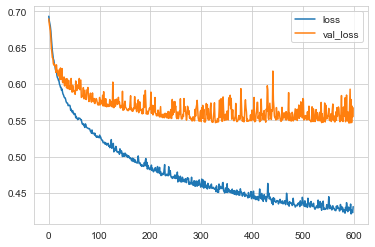

In [97]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [132]:
model = Sequential()

model.add(Dense(units=19,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=13,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [133]:
from tensorflow.keras.callbacks import EarlyStopping

In [134]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [135]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 863 samples, validate on 288 samples
Epoch 1/600
863/863 [==============================] - 1s 1ms/sample - loss: 0.7503 - val_loss: 0.6831
Epoch 2/600
863/863 [==============================] - 0s 131us/sample - loss: 0.7268 - val_loss: 0.6877
Epoch 3/600
863/863 [==============================] - 0s 124us/sample - loss: 0.7242 - val_loss: 0.6873
Epoch 4/600
863/863 [==============================] - 0s 126us/sample - loss: 0.7028 - val_loss: 0.6837
Epoch 5/600
863/863 [==============================] - 0s 120us/sample - loss: 0.7051 - val_loss: 0.6834
Epoch 6/600
863/863 [==============================] - 0s 122us/sample - loss: 0.6964 - val_loss: 0.6827
Epoch 7/600
863/863 [==============================] - 0s 123us/sample - loss: 0.6941 - val_loss: 0.6813
Epoch 8/600
863/863 [==============================] - 0s 120us/sample - loss: 0.6902 - val_loss: 0.6799
Epoch 9/600
863/863 [==============================] - 0s 131us/sample - loss: 0.6969 - val_loss: 0.6798
Epoch 10/60

Epoch 78/600
863/863 [==============================] - 0s 214us/sample - loss: 0.6189 - val_loss: 0.6191
Epoch 79/600
863/863 [==============================] - 0s 140us/sample - loss: 0.6233 - val_loss: 0.6220
Epoch 80/600
863/863 [==============================] - 0s 157us/sample - loss: 0.6177 - val_loss: 0.6194
Epoch 81/600
863/863 [==============================] - 0s 211us/sample - loss: 0.6247 - val_loss: 0.6195
Epoch 82/600
863/863 [==============================] - 0s 223us/sample - loss: 0.6137 - val_loss: 0.6156
Epoch 83/600
863/863 [==============================] - ETA: 0s - loss: 0.609 - 0s 200us/sample - loss: 0.6164 - val_loss: 0.6214
Epoch 84/600
863/863 [==============================] - 0s 206us/sample - loss: 0.6228 - val_loss: 0.6201
Epoch 85/600
863/863 [==============================] - 0s 227us/sample - loss: 0.6136 - val_loss: 0.6176
Epoch 86/600
863/863 [==============================] - 0s 175us/sample - loss: 0.6130 - val_loss: 0.6156
Epoch 87/600
863/863 [

863/863 [==============================] - 0s 247us/sample - loss: 0.5880 - val_loss: 0.6095
Epoch 155/600
863/863 [==============================] - 0s 257us/sample - loss: 0.5685 - val_loss: 0.5957
Epoch 156/600
863/863 [==============================] - 0s 262us/sample - loss: 0.5726 - val_loss: 0.6014
Epoch 157/600
863/863 [==============================] - 0s 234us/sample - loss: 0.5729 - val_loss: 0.6005
Epoch 158/600
863/863 [==============================] - 0s 257us/sample - loss: 0.5796 - val_loss: 0.6003
Epoch 159/600
863/863 [==============================] - 0s 230us/sample - loss: 0.5834 - val_loss: 0.6115
Epoch 160/600
863/863 [==============================] - 0s 231us/sample - loss: 0.5827 - val_loss: 0.6011
Epoch 161/600
863/863 [==============================] - 0s 221us/sample - loss: 0.5753 - val_loss: 0.6028
Epoch 162/600
863/863 [==============================] - 0s 197us/sample - loss: 0.5825 - val_loss: 0.5980
Epoch 163/600
863/863 [============================

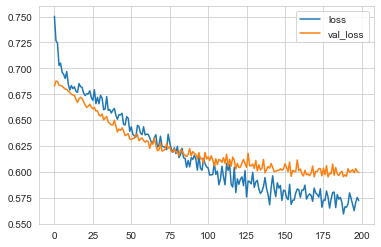

In [136]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [137]:
predictions = model.predict_classes(X_test)

In [138]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.58      0.79      0.67       118
           1       0.80      0.60      0.69       170

    accuracy                           0.68       288
   macro avg       0.69      0.69      0.68       288
weighted avg       0.71      0.68      0.68       288

[[ 93  25]
 [ 68 102]]
